In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('US Monthly Air Passengers.csv')

In [3]:
df.columns

Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'YEAR', 'MONTH'],
      dtype='object')

In [4]:
df = df[df['ORIGIN_COUNTRY_NAME'] == 'India']

In [5]:
df['YEAR'].unique()

array([2000, 2001, 2003, 2002, 2009, 2004, 2005, 2006, 2007, 2008, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [13]:
df.to_csv('India to US.csv',index=False)

In [6]:
df = df[[ 'YEAR', 'MONTH','Sum_PASSENGERS']]

In [7]:
data = df.groupby(['YEAR','MONTH']).sum()

In [8]:
data

Sum_PASSENGERS
YEAR MONTH                
2000 1               10852
     2                9941
     3               10676
     4               10004
     5               10302
...                    ...
2020 6               18679
     7               20301
     8               17571
     9               13567
     10              16466

[249 rows x 1 columns]

In [9]:
dates = pd.date_range(start='1/2000',end='10/2020',freq='M')

In [10]:
df_2000_2020 = pd.DataFrame(data=data.values,index=dates,columns=['Number of Passengers'])

<AxesSubplot:>

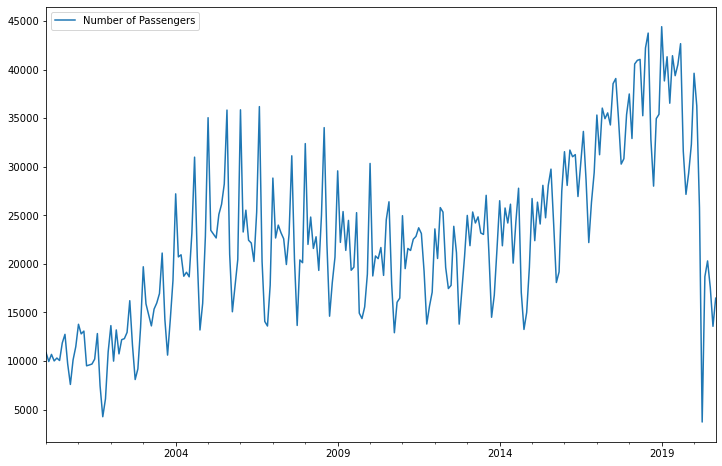

In [12]:
df_2000_2020.plot(figsize=(12,8))

<AxesSubplot:>

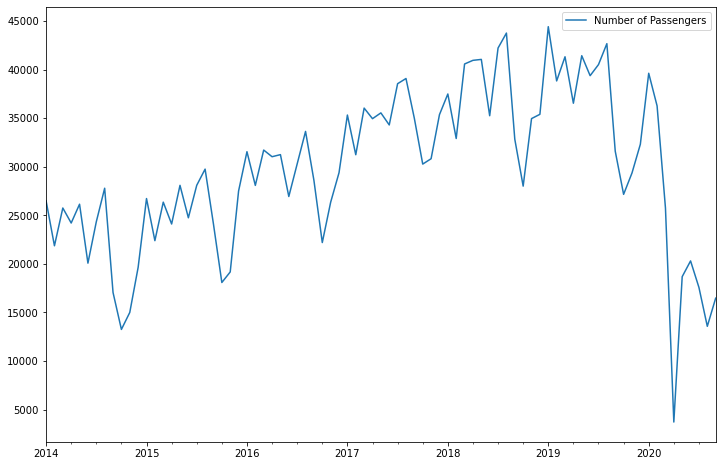

In [17]:
df_2000_2020.loc['2014-01-31':].plot(figsize=(12,8))

In [18]:
df_2014_2019 = df_2000_2020.loc['2014-01-31':'2019-12-31']

<AxesSubplot:>

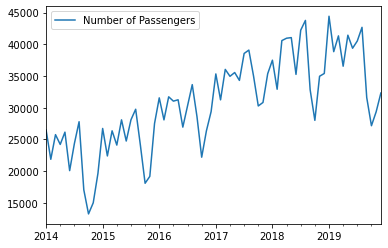

In [19]:
df_2014_2019.plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

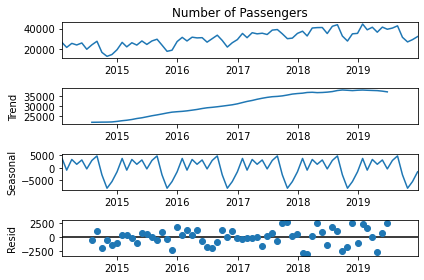

In [21]:
res = seasonal_decompose(df_2014_2019['Number of Passengers'],model='add')
res.plot();

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from pmdarima import auto_arima

In [24]:
auto_arima(df_2014_2019['Number of Passengers'],m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1405.649, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1358.525, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1377.379, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1403.678, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1405.101, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1352.647, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1358.638, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1361.655, Time=0.25 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1353.674, Time=0.16 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1353.071, Time=0.29 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1358.703, Time=0.46 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1351.542, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1357.182, Time=0.10 sec
 ARIMA(0,1,1)(2,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -667.809
Date:                            Mon, 09 Aug 2021   AIC                           1343.618
Time:                                    20:54:32   BIC                           1352.669
Sample:                                         0   HQIC                          1347.217
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2317      0.083     -2.806      0.005      -0.393      -0.070
ar.S.L12       0.9913      0.029     34.481      0.000       0.935       1.048
ma.S.L12      -0.8788      0.204     -4.310      0.000      -1.278      -0.479
sigma2      6.744e+06   2.47e-08   2.73e+14      0.000    6.74e+06    6.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.34   Prob(JB):                         0.87
Heteroskedasticity (H):               0.81   Skew:                            -0.12
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+30. Standard errors may be unstable.
"""

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
train = df_2014_2019.iloc[:-24]
test = df_2014_2019.iloc[-24:]

In [79]:
model = SARIMAX(train['Number of Passengers'],order=(0,1,1),seasonal_order=(1,0,1,12)).fit()

In [80]:
start=len(train)
end=len(train)+len(test)-1
predictions = model.predict(start=start, end=end).rename('SARIMA(0,1,1)(1,0,1,12) Predictions')

<AxesSubplot:>

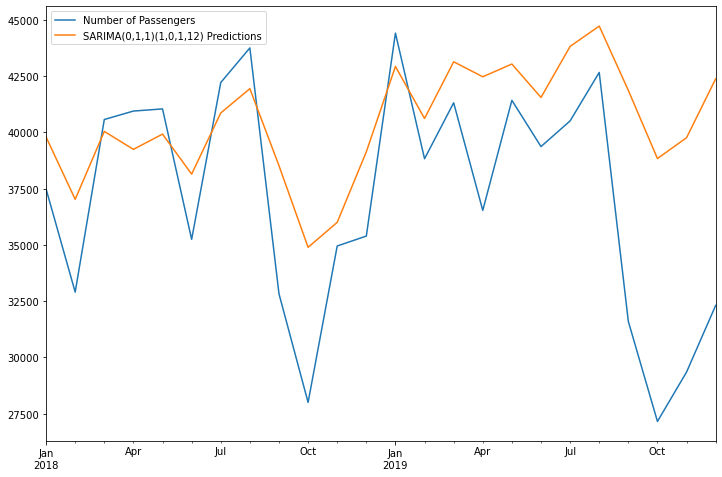

In [86]:
test.plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
np.sqrt(mean_squared_error(test,predictions))

5220.37470253854

In [89]:
test.mean()

Number of Passengers    37120.208333
dtype: float64

In [90]:
# Forecasting

In [91]:
final_model = SARIMAX(df_2014_2019['Number of Passengers'],order=(0,1,1),seasonal_order=(1,0,1,12)).fit()

In [94]:
start=len(df_2014_2019)
end=len(df_2014_2019)+len(test)-1
fcast = model.predict(start=start, end=end).rename('SARIMA(0,1,1)(1,0,1,12) Forecast')

<AxesSubplot:>

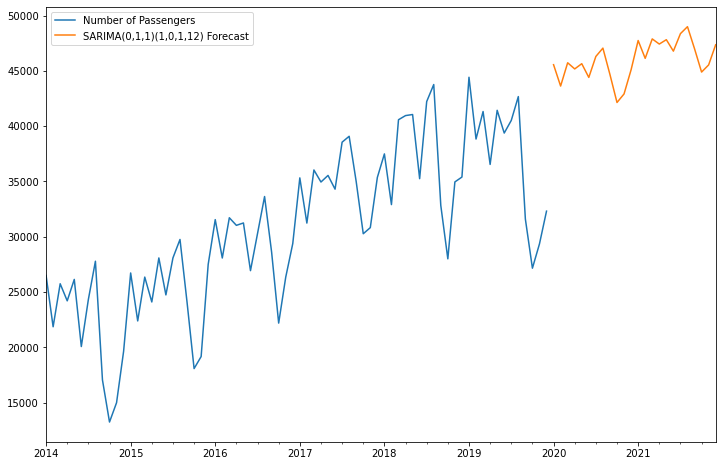

In [108]:
df_2014_2019.plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)

In [125]:
fcast_df = pd.DataFrame(fcast)

In [128]:
fcast_df.columns = ['Number of Passengers']

<AxesSubplot:>

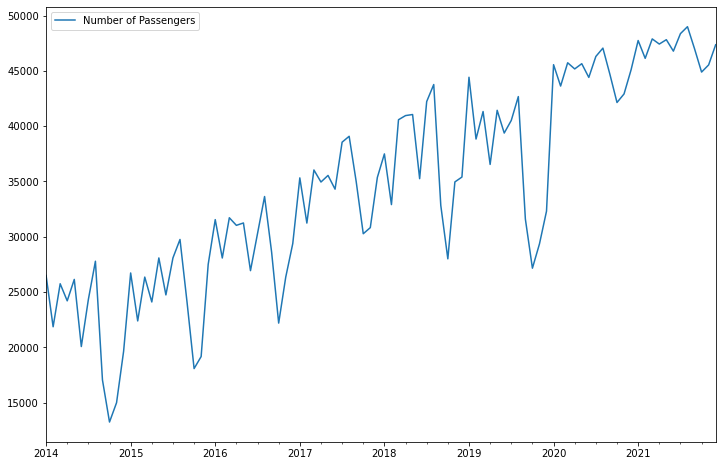

In [137]:
df2.append(fcast_df).plot(figsize=(12,8))
# Predictions combined